# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [39]:
#import numpy and pandas
import pandas as pd
import numpy as np

import scipy.stats as st


# Challenge 1 - The `stats` Submodule

This submodule contains statistical functions for conducting hypothesis tests, producing various distributions and other useful tools. Let's examine this submodule using the KickStarter dataset. Load the data using the `ks-projects-201801.csv` file

In [40]:
# Your code here:
kickstarter = pd.read_csv('..\ks-projects-201801.csv')

Now print the `head` function to examine the dataset.

In [41]:
# Your code here:
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Import the `mode` function from `scipy.stats` and find the mode of the `country` and `currency` column.

In [42]:
# Your code here:
from scipy.stats import mode

print(mode(kickstarter['country']))
print(mode(kickstarter['currency']))


ModeResult(mode=array(['US'], dtype=object), count=array([292627]))
ModeResult(mode=array(['USD'], dtype=object), count=array([295365]))


The trimmed mean is a function that computes the mean of the data with observations removed. The most common way to compute a trimmed mean is by specifying a percentage and then removing elements from both ends. However, we can also specify a threshold on both ends. The goal of this function is to create a more robust method of computing the mean that is less influenced by outliers. SciPy contains a function called `tmean` for computing the trimmed mean. 

In the cell below, import the `tmean` function and then find the 75th percentile of the `goal` column. Compute the trimmed mean between 0 and the 75th percentile of the column. Read more about the `tmean` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tmean.html#scipy.stats.tmean).

In [43]:
# Your code here:
from scipy.stats import tmean

print(tmean(kickstarter['goal'], limits= (0, len(kickstarter)*0.75)))


16264.213857704375


#### SciPy contains various statistical tests. One of the tests is Fisher's exact test. This test is used for contingency tables. 

The test originates from the "Lady Tasting Tea" experiment. In 1935, Fisher published the results of the experiment in his book. The experiment was based on a claim by Muriel Bristol that she can taste whether tea or milk was first poured into the cup. Fisher devised this test to disprove her claim. The null hypothesis is that the treatments do not affect outcomes, while the alternative hypothesis is that the treatment does affect outcome. To read more about Fisher's exact test, see:

* [Wikipedia's explanation](http://b.link/test61)
* [A cool deep explanation](http://b.link/handbook47)
* [An explanation with some important Fisher's considerations](http://b.link/significance76)

Let's perform Fisher's exact test on our KickStarter data. We intend to test the hypothesis that the choice of currency has an impact on meeting the pledge goal. We'll start by creating two derived columns in our dataframe. The first will contain 1 if the amount of money in `usd_pledged_real` is greater than the amount of money in `usd_goal_real`. We can compute this by using the `np.where` function. If the amount in one column is greater than the other, enter a value of 1, otherwise enter a value of zero. Add this column to the dataframe and name it `goal_met`.

In [44]:
# Your code here:

kickstarter['goal_met'] = np.where(kickstarter['usd_pledged_real'] > kickstarter['usd_goal_real'], 1,0)

Next, create a column that checks whether the currency of the project is in US Dollars. Create a column called `usd` using the `np.where` function where if the currency is US Dollars, assign a value of 1 to the row and 0 otherwise.

In [45]:
# Your code here:

kickstarter['usd'] = np.where(kickstarter['currency'] == 'USD', 1,0)

Now create a contingency table using the `pd.crosstab` function in the cell below to compare the `goal_met` and `usd` columns.

In [46]:
cont_tab = pd.crosstab(kickstarter['goal_met'], kickstarter['usd'])
cont_tab

usd,0,1
goal_met,,
0,58685,187130
1,24611,108235


Import the `fisher_exact` function from `scipy.stats` and conduct the hypothesis test on the contingency table that you have generated above. You can read more about the `fisher_exact` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact). The output of the function should be the odds ratio and the p-value. The p-value will provide you with the outcome of the test.

In [47]:
# Your code here:
from scipy.stats import fisher_exact

#H0: The choice of currency DOES NOT have an impact on meeting the pledge goal.
#H1: The choice of currency DOES have an impact on meeting the pledge goal.

alpha = 0.05

stat, p_value = st.fisher_exact(cont_tab)
print(stat, p_value)
print(p_value<alpha)
print("The p_value is lower than alpha. Seems that we can reject the null hypothesis and say with a 95% confidence that the currency does have an impact on meeting the pledge goal.")



1.3791838163150314 9.75e-321
True
The p_value is lower than alpha. Seems that we can reject the null hypothesis and say with a 95% confidence that the currency does have an impact on meeting the pledge goal.


# Challenge 2 - The `interpolate` submodule

This submodule allows us to interpolate between two points and create a continuous distribution based on the observed data.

In the cell below, import the `interp1d` function from `scipy.interpolate` and first take a sample of 10 rows from `kickstarter`. 

**Make sure there are not duplicated values in `backers`**

In [56]:
# Your code here:
from scipy.interpolate import interp1d

k_sample = kickstarter.sample(10)
k_sample

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_met,usd
354635,876678199,AMBITION: the female American serial killer mu...,Musical,Theater,USD,2016-06-13,4200.0,2016-05-16 21:14:10,4275.0,successful,55,US,4275.0,4275.00,4200.00,1,1
165372,18414144,Custom Coin Rings,Jewelry,Fashion,USD,2017-06-30,2017.0,2017-05-31 00:52:14,223.0,failed,11,US,90.0,223.00,2017.00,0,1
116087,1589492034,BeachSheetz - The World's Best Outdoor Accessory,Product Design,Design,USD,2017-06-16,16000.0,2017-05-17 01:35:41,150825.0,successful,2134,US,3538.0,150825.00,16000.00,1,1
39047,1198385732,Slime Quest,Video Games,Games,GBP,2015-02-10,5000.0,2015-01-11 15:59:44,50.0,failed,1,GB,75.8,76.89,7688.88,0,0
85938,1437008564,From Decorated to Dishwasher,Nonfiction,Publishing,USD,2014-10-14,65000.0,2014-09-14 04:05:58,0.0,failed,0,US,0.0,0.00,65000.00,0,1
293320,563051965,A Sky Beyond,Comic Books,Comics,USD,2015-07-08,15000.0,2015-06-08 14:25:43,1099.0,failed,8,US,1099.0,1099.00,15000.00,0,1
51446,1261824988,Energy Loss and Health Concerns In Your Home,Academic,Publishing,USD,2016-04-17,15000.0,2016-03-18 20:25:00,40.0,failed,2,US,40.0,40.00,15000.00,0,1
63972,1325299391,Tyler Keith and The Apostles: Black Highway,Rock,Music,USD,2012-03-08,2700.0,2012-02-06 20:08:52,2955.0,successful,82,US,2955.0,2955.00,2700.00,1,1
80038,1407089887,"Penny's Loafer Dog Toy: A ""Shoe"" to Chew, Eat,...",Product Design,Design,USD,2016-08-15,15000.0,2016-07-07 17:00:31,15024.0,successful,138,US,931.0,15024.00,15000.00,1,1
74595,1380108718,Lightfoot comic book,Comics,Comics,USD,2013-04-28,10000.0,2013-02-27 07:34:27,100.0,failed,5,US,100.0,100.00,10000.00,0,1


Next, create a linear interpolation of `usd_pledged_real` as a function of the `backers`. Create a function `f` that generates a linear interpolation of `usd_pledged_real` as predicted by the amount of `backers`.

In [58]:
# Your code here:
f = interp1d(k_sample['usd_pledged_real'], k_sample['backers'])
f


Now create a new variable called `x_new`. This variable will contain all integers between the minimum number of backers in our sample and the maximum number of backers. The goal here is to take the dataset that contains few obeservations due to sampling and fill all observations with a value using the interpolation function. 

Hint: one option is the `np.arange` function.

In [60]:
# Your code here:
x_new = np.arange(k_sample['backers'].min(), k_sample['backers'].max()+1)
x_new


array([   0,    1,    2, ..., 2132, 2133, 2134])

Plot function `f` for all values of `x_new`. Run the code below.

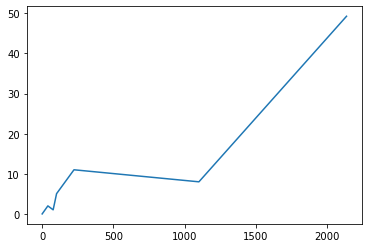

In [61]:
# Run this code:

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_new, f(x_new))

Next create a function that will generate a cubic interpolation function. Name the function `g`.

In [63]:
# Your code here:

g = interp1d(k_sample['usd_pledged_real'], k_sample['backers'], kind = 'cubic')
g


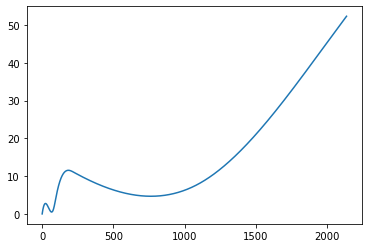

In [64]:
# Run this code:

plt.plot(x_new, g(x_new))

# Bonus Challenge - The Binomial Distribution

The binomial distribution allows us to calculate the probability of k successes in n trials for a random variable with two possible outcomes (which we typically label success and failure).  

The probability of success is typically denoted by p and the probability of failure is denoted by 1-p.

The `scipy.stats` submodule contains a `binom` function for computing the probabilites of a random variable with the binomial distribution. You may read more about the binomial distribution [here](http://b.link/binomial55)

* In the cell below, compute the probability that a dice lands on 5 exactly 3 times in 8 tries.


In [66]:
# Your code here:

n = 8   # 8 independent trials
k = 3   # 3 successes
p = 1/6 # Individual success probability

binom_dist = st.binom(n,p)

binom_dist.pmf(3)

0.10419048163389724

* Do a simulation for the last event: do a function that simulate 8 tries and return a 1 if the result is 5 exactly 3 times and 0 if not. Now launch your simulation.

In [96]:
# Your code here:
import random

def dicetry():
    sim_n_times = [random.randint(1,6) for i in range(8)]
    if sim_n_times.count(5) == 3:
        return 1
    else:
        return 0

dicetry()

0

* Launch 10 simulations and represent the result in a bar plot. Now launch 1000 simulations and represent it. What do you see?

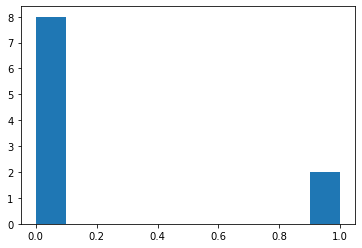

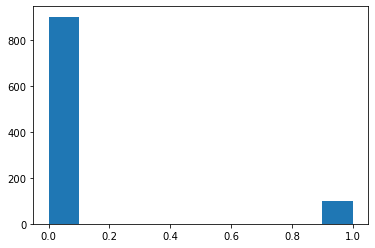

In [106]:
# Your code here:
import matplotlib.pyplot as plt

tentimes = [dicetry() for i in range(10)]
thousandtimes = [dicetry() for i in range(1000)]

plt.hist(tentimes)
plt.show()
plt.hist(thousandtimes)
plt.show()

# The distribution in both plots looks similar to the 0.10 probability calculated above.